# Exploratory Data Analysis

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:

data = pd.read_csv("/Users/zey/Desktop/final-project-zeynep-tinaz-erva-yurtbas-gizem-yuzer/ecom-user-churn-data.csv")

In [53]:
data=data.drop("visitorid",axis=1)

In [54]:
data.head()

,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,tran_n,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
0,23.0,16.0,0.0,0.0,39.0,2.0,0.051282,3.0,1.500000,0.0,...,0,0,0,0,3,0,0,0,0,1
1,23.0,61.0,0.0,0.0,85.0,2.0,0.023529,2.0,1.000000,0.0,...,0,0,0,0,0,0,1,0,0,1
2,14.0,0.1,0.3,3.0,21.0,11.0,0.523810,13.0,1.181818,0.0,...,0,0,0,0,0,0,13,0,0,1
3,11.0,13.0,0.0,0.0,24.0,2.0,0.083333,4.0,2.000000,0.0,...,0,0,0,3,1,0,0,0,0,1
4,16.0,26.0,0.0,0.0,43.0,2.0,0.046512,2.0,1.000000,0.0,...,2,0,0,0,0,0,0,0,0,1


In [55]:
data.describe()

,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,tran_n,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
count,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,...,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000
mean,15.454840,11.231611,2.711961,-0.020100,33.822947,3.366445,0.172372,6.716277,1.720975,0.111248,...,0.955792,0.773714,0.382977,0.732424,0.503343,0.447020,2.102577,0.038130,0.099579,0.885591
std,9.184645,18.162743,6.583917,0.917701,25.237703,7.380573,0.372614,38.528882,1.455885,2.798217,...,6.086722,5.003517,4.569604,4.977989,3.259194,3.873684,16.273213,0.593681,1.135149,0.318311
min,0.000000,0.000000,0.000000,-1.000000,0.000000,2.000000,-1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,-1.000000,16.000000,2.000000,0.060606,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,16.000000,2.250000,0.000000,0.000000,26.000000,2.000000,0.090909,3.000000,1.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23.000000,14.250000,1.000000,0.638646,46.000000,3.000000,0.166667,6.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,31.000000,99.000000,47.500000,11.525121,99.000000,475.000000,18.000000,5549.000000,59.000000,461.000000,...,576.000000,445.000000,481.000000,564.000000,317.000000,420.000000,2282.000000,54.000000,105.000000,1.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ses_rec        49358 non-null  float64
 1   ses_rec_avg    49358 non-null  float64
 2   ses_rec_sd     49358 non-null  float64
 3   ses_rec_cv     49358 non-null  float64
 4   user_rec       49358 non-null  float64
 5   ses_n          49358 non-null  float64
 6   ses_n_r        49358 non-null  float64
 7   int_n          49358 non-null  float64
 8   int_n_r        49358 non-null  float64
 9   tran_n         49358 non-null  float64
 10  tran_n_r       49358 non-null  float64
 11  rev_sum        49358 non-null  float64
 12  rev_sum_r      49358 non-null  float64
 13  major_spend_r  49358 non-null  float64
 14  int_cat_n_avg  49358 non-null  float64
 15  int_itm_n_avg  49358 non-null  float64
 16  ses_mo_avg     49358 non-null  float64
 17  ses_mo_sd      49358 non-null  float64
 18  ses_ho

In [57]:
data.nunique()

ses_rec            32
ses_rec_avg      1117
ses_rec_sd       4234
ses_rec_cv       5311
user_rec          100
ses_n             125
ses_n_r          1165
int_n             235
int_n_r           766
tran_n             39
tran_n_r          160
rev_sum          1271
rev_sum_r        1604
major_spend_r     115
int_cat_n_avg     239
int_itm_n_avg     626
ses_mo_avg        514
ses_mo_sd         743
ses_ho_avg       1164
ses_ho_sd        3368
ses_wknd_r        245
ses_len_avg      6586
time_to_int      8415
time_to_tran        2
int_cat1_n         55
int_cat2_n         45
int_cat3_n         27
int_cat4_n          4
int_cat5_n         27
int_cat6_n         16
int_cat7_n         10
int_cat8_n          3
int_cat9_n          4
int_cat10_n        25
int_cat11_n         9
int_cat12_n        47
int_cat13_n        13
int_cat15_n         1
int_cat16_n       108
int_cat17_n       103
int_cat18_n        87
int_cat19_n        88
int_cat20_n        75
int_cat21_n        76
int_cat22_n       149
int_cat23_

Null values

In [58]:
data.isnull().sum()

ses_rec          0
ses_rec_avg      0
ses_rec_sd       0
ses_rec_cv       0
user_rec         0
ses_n            0
ses_n_r          0
int_n            0
int_n_r          0
tran_n           0
tran_n_r         0
rev_sum          0
rev_sum_r        0
major_spend_r    0
int_cat_n_avg    0
int_itm_n_avg    0
ses_mo_avg       0
ses_mo_sd        0
ses_ho_avg       0
ses_ho_sd        0
ses_wknd_r       0
ses_len_avg      0
time_to_int      0
time_to_tran     0
int_cat1_n       0
int_cat2_n       0
int_cat3_n       0
int_cat4_n       0
int_cat5_n       0
int_cat6_n       0
int_cat7_n       0
int_cat8_n       0
int_cat9_n       0
int_cat10_n      0
int_cat11_n      0
int_cat12_n      0
int_cat13_n      0
int_cat15_n      0
int_cat16_n      0
int_cat17_n      0
int_cat18_n      0
int_cat19_n      0
int_cat20_n      0
int_cat21_n      0
int_cat22_n      0
int_cat23_n      0
int_cat24_n      0
target_class     0
dtype: int64

In [59]:
data.shape

(49358, 48)

Feauture Selection

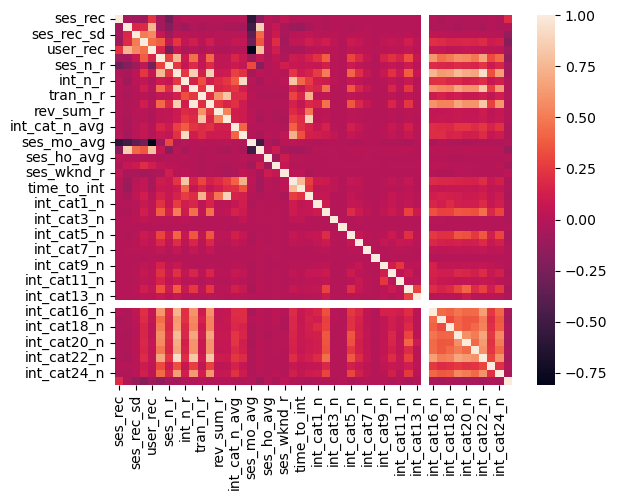

In [60]:
sns.heatmap(data.corr().round(2))
plt.show()

# Data Shuffling

In [61]:
data=data.sample(frac=1)

target_class
1    43711
0     5647
Name: count, dtype: int64


<Axes: ylabel='Type'>

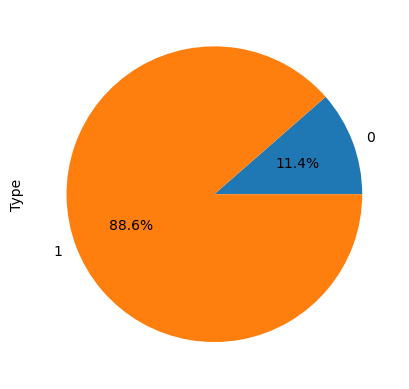

In [62]:
print(data["target_class"].value_counts())

data.groupby("target_class").size().plot(kind='pie',
                                       y = "target_class",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [63]:
churn     = data[data['target_class'] == 0]
retention = data[data['target_class'] == 1]
print(churn.shape)
print(retention.shape)

(5647, 48)
(43711, 48)


## Churn Upsample

In [64]:
from sklearn.utils import resample
churn_upsample = resample(churn,
             replace=True,
             n_samples=20000,
             random_state=42)

print(churn_upsample.shape)

(20000, 48)


SMOTE upsampling

## Retention Downsample

In [65]:
from sklearn.utils import resample
retention_downsample = resample(retention,
             replace=True,
             n_samples=len(churn_upsample),
             random_state=42)

print(retention_downsample.shape)

(20000, 48)


Upsampling and Downsampling (Together)

target_class
1    20000
0    20000
Name: count, dtype: int64


<Axes: ylabel='Type'>

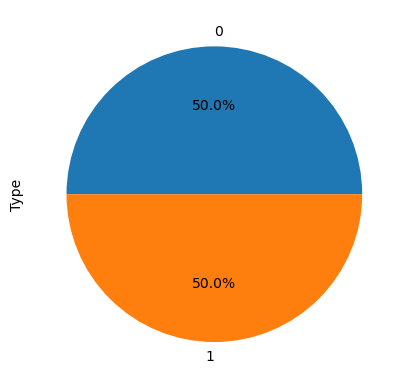

In [66]:
data_downsampled = pd.concat([retention_downsample, churn_upsample])

print(data_downsampled["target_class"].value_counts())

data_downsampled.groupby('target_class').size().plot(kind='pie',
                                       y = "target_class",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [67]:
from sklearn.model_selection import train_test_split
X = data_downsampled.drop('target_class', axis=1)
y = data_downsampled['target_class']

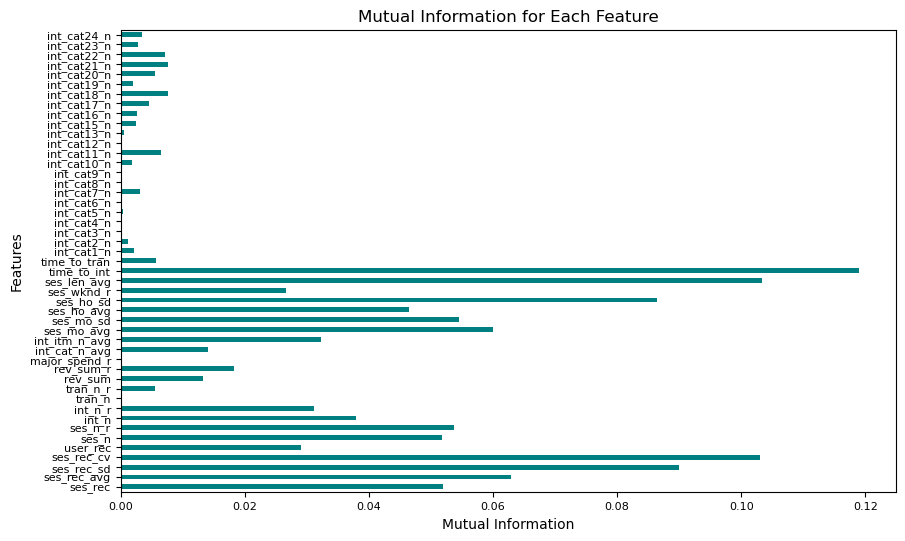

In [68]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming X and y are your feature matrix and target variable
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, data_downsampled.columns[0:len(data.columns)-1])

# Separate positive and negative values
positive_values = feat_importances[feat_importances >= 0]
negative_values = feat_importances[feat_importances < 0]

# Create a horizontal bar plot for positive values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
positive_values.plot(kind='barh', color='teal', fontsize=8)

# Create a horizontal bar plot for negative values
plt.barh(negative_values.index, negative_values, color='red')

plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Mutual Information for Each Feature')
plt.show()

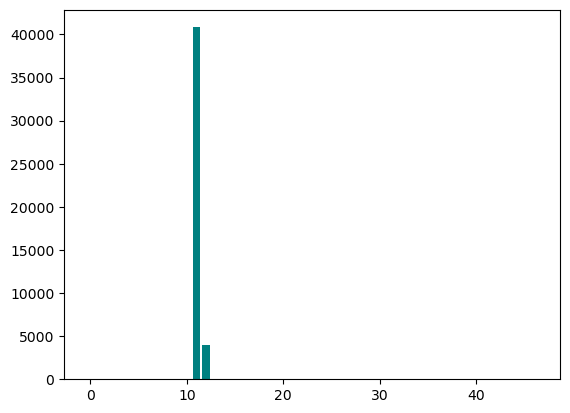

In [69]:
mean_abs_dif=np.sum(np.abs(X-np.mean(X,axis=0)),axis=0)/X.shape[0]
plt.bar(np.arange(X.shape[1]),mean_abs_dif,color='teal')
plt.show()

## Feature Selection with mRMR

In [70]:
pip install mrmr_selection

Note: you may need to restart the kernel to use updated packages.


In [71]:
import mrmr
from sklearn.datasets import make_classification
X, y = make_classification(n_samples =40000, n_features = 48)
X= pd.DataFrame(data_downsampled.drop(['target_class'],axis=1))
y = pd.Series(data_downsampled['target_class'])

from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X, y=y, K=25)

100%|███████████████████████████████████████████| 25/25 [00:03<00:00,  6.73it/s]


In [72]:
selected_features

['ses_rec',
 'ses_rec_cv',
 'ses_mo_sd',
 'ses_rec_sd',
 'ses_n',
 'int_cat3_n',
 'ses_wknd_r',
 'user_rec',
 'int_itm_n_avg',
 'ses_n_r',
 'ses_ho_sd',
 'int_cat17_n',
 'time_to_tran',
 'int_cat20_n',
 'int_cat4_n',
 'time_to_int',
 'int_cat_n_avg',
 'int_n',
 'int_n_r',
 'int_cat21_n',
 'int_cat6_n',
 'int_cat19_n',
 'ses_len_avg',
 'int_cat13_n',
 'int_cat16_n']

In [73]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# SelectKBest with mutual information for feature selection
selector = SelectKBest(mutual_info_classif, k=25)
selector.fit(data_downsampled.drop(columns=['target_class']), data_downsampled['target_class'])

# Check the number of features in the dataset
num_features = len(data_downsampled.columns)

# Get selected features based on mutual information
selected_features_indices = selector.get_support(indices=True)

# Print information for debugging
print("Number of features:", num_features)
print("Selected Features Indices:", selected_features_indices)

# Ensure indices are within bounds
selected_features_indices = [idx for idx in selected_features_indices if idx < num_features]

# Retrieve the names of the selected features
selected_features2 = data_downsampled.columns[selected_features_indices]

# Print the names of selected features
print("Selected Features:")
print(selected_features2)


Number of features: 48
Selected Features Indices: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 39
 44]
Selected Features:
Index(['ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec',
       'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n_r', 'rev_sum',
       'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg',
       'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r',
       'ses_len_avg', 'time_to_int', 'time_to_tran', 'int_cat17_n',
       'int_cat22_n'],
      dtype='object')


In [74]:

columns_to_drop = data_downsampled.columns.difference(selected_features2)

# Exclude 'target_class' from the columns to drop
columns_to_drop = columns_to_drop.difference(['target_class'])

# Check if any columns need to be dropped
if not columns_to_drop.empty:
    data_downsampled.drop(columns=columns_to_drop, inplace=True)

# The DataFrame 'data' now contains only the columns specified in selected_features, excluding 'target_class'


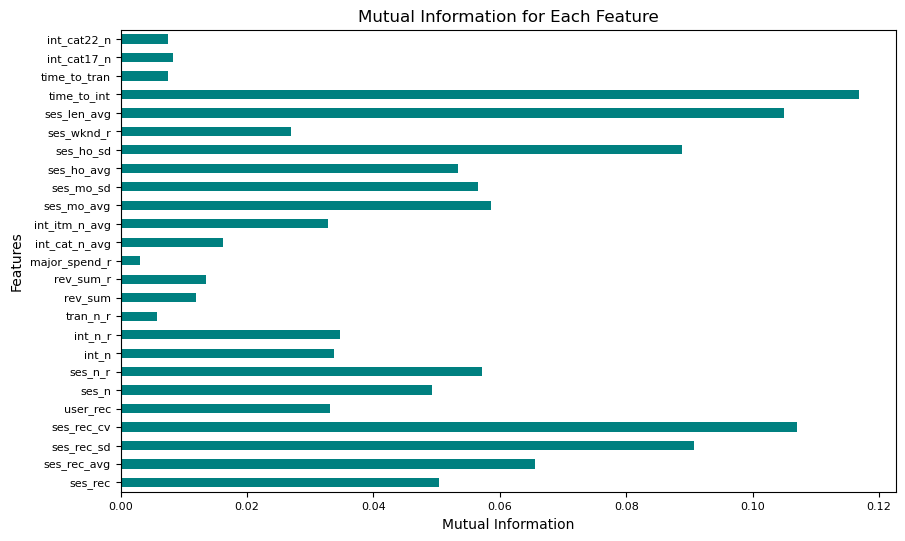

In [75]:
from sklearn.feature_selection import mutual_info_classif

X = data_downsampled.drop('target_class', axis=1)
y = data_downsampled['target_class']

# Assuming X and y are your feature matrix and target variable
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, data_downsampled.columns[0:len(data_downsampled.columns)-1])

# Separate positive and negative values
positive_values = feat_importances[feat_importances >= 0]
negative_values = feat_importances[feat_importances < 0]

# Create a horizontal bar plot for positive values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
positive_values.plot(kind='barh', color='teal', fontsize=8)

# Create a horizontal bar plot for negative values
plt.barh(negative_values.index, negative_values, color='red')

plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Mutual Information for Each Feature')
plt.show()

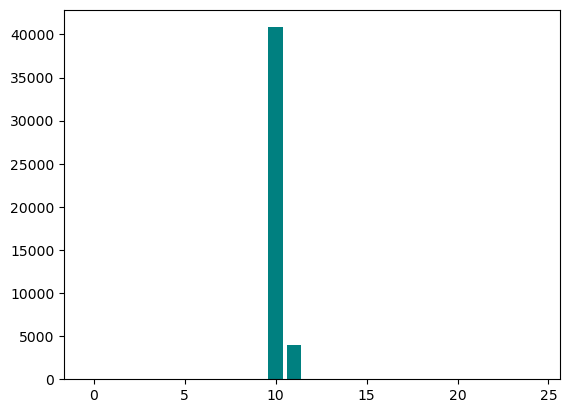

In [76]:
mean_abs_dif=np.sum(np.abs(X-np.mean(X,axis=0)),axis=0)/X.shape[0]
plt.bar(np.arange(X.shape[1]),mean_abs_dif,color='teal')
plt.show()

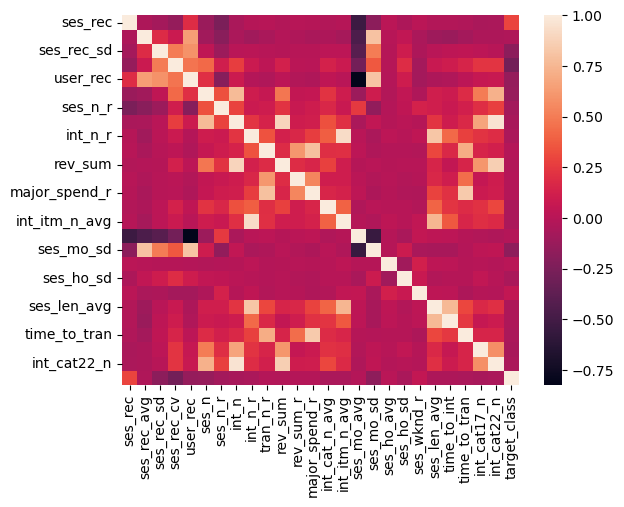

In [77]:
sns.heatmap(data_downsampled.corr())
plt.show()

In [78]:
len(data_downsampled.columns)

26

Splitting data set into test and train sets

In [79]:
from sklearn.model_selection import train_test_split
X = data_downsampled.drop('target_class', axis=1)
y = data_downsampled['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# XGBoost

In [80]:
pip install xgboost==2.0

Note: you may need to restart the kernel to use updated packages.


In [81]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [45, 50, 55],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 50, 'subsample': 0.7}
Best score:  0.90121875


In [82]:
from xgboost import XGBClassifier

params = {"eta":0.1,
            'max_depth': 50,
            'gamma': 0.1,
            'min_child_weight': 1,
            'n_estimators':100,
            'subsample': 0.7
        }


xgb_model = XGBClassifier(**params)


xgb_model.fit(X_train, y_train)# import XGBClassifier


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,classification_report, confusion_matrix
yxgb_pred = xgb_model.predict(X_test)

print("\nModel  Metrics:")
print(classification_report(y_test, yxgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, yxgb_pred))


Model  Metrics:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3996
           1       0.95      0.89      0.92      4004

    accuracy                           0.92      8000
   macro avg       0.93      0.92      0.92      8000
weighted avg       0.93      0.92      0.92      8000

Confusion Matrix:
 [[3825  171]
 [ 442 3562]]


# Support Vector Machine (SVM)

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix



# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the SVM model
svm_model = SVC(kernel='linear')  # You can choose other kernels like 'rbf', 'poly', etc.

# Training the model
svm_model.fit(X_train, y_train)

# Making predictions
ys_pred = svm_model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, ys_pred))
print(classification_report(y_test, ys_pred))

[[2539 1457]
 [1166 2838]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      3996
           1       0.66      0.71      0.68      4004

    accuracy                           0.67      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.67      0.67      0.67      8000



# Logistic Regression

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

# Creating the Logistic Regression model
log_reg_model = OneVsRestClassifier(LogisticRegression())

# Training the model
log_reg_model.fit(X_train, y_train)

# Making predictions
yl_pred = log_reg_model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, yl_pred))
print(classification_report(y_test, yl_pred))


[[2517 1479]
 [1144 2860]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      3996
           1       0.66      0.71      0.69      4004

    accuracy                           0.67      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.67      0.67      0.67      8000



# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions using the trained model on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the performance of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Model: {accuracy_rf}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy of Random Forest Model: 0.929375

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      3996
           1       0.96      0.90      0.93      4004

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000

Confusion Matrix:
 [[3843  153]
 [ 412 3592]]


# Ensemble Learning

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Assuming xgb_model, svm_model, and log_reg_model are your previously trained models

# Combine the models into a list of tuples
ensemble_models = [('xgboost', xgb_model), ('forest', random_forest_model), ('logistic', log_reg_model)]

# Create the voting classifier, using hard voting
voting_clf = VotingClassifier(estimators=ensemble_models, voting='hard')

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Making predictions
y_pred_ensemble = voting_clf.predict(X_test)

# Evaluating the ensemble model
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Accuracy of Ensemble Model: {accuracy}")



Accuracy of Ensemble Model: 0.923125


In [88]:
print(classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3996
           1       0.96      0.89      0.92      4004

    accuracy                           0.92      8000
   macro avg       0.93      0.92      0.92      8000
weighted avg       0.93      0.92      0.92      8000

Confusion Matrix:
 [[3829  167]
 [ 448 3556]]


# Roc_auc

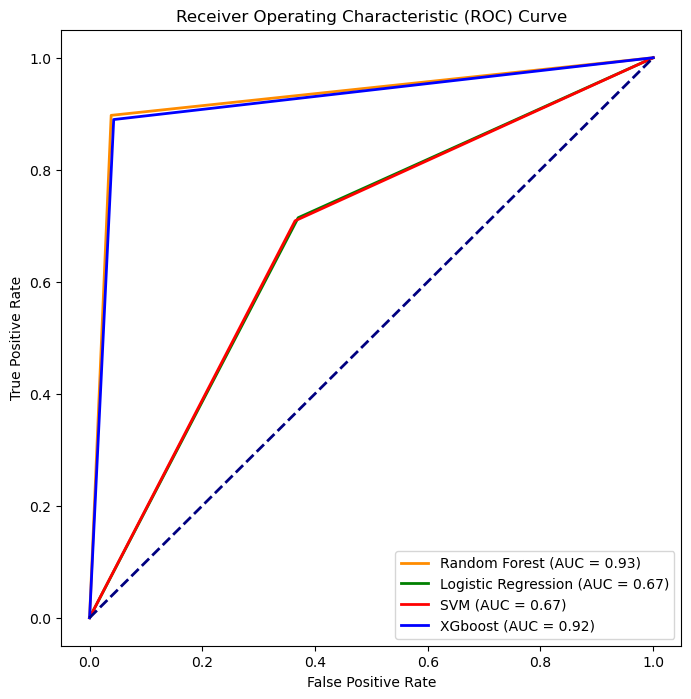

In [89]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Compute ROC curve and AUC for XGB
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, yxgb_pred)
roc_auc_xgb = roc_auc_score(y_test, yxgb_pred)
# Compute ROC curve and AUC for SVM
fpr_sv, tpr_sv, _ = roc_curve(y_test, ys_pred)
roc_auc_sv = roc_auc_score(y_test, ys_pred)
# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, yl_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lr = roc_auc_score(y_test, yl_pred)
# Plot the ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_sv, tpr_sv, color='red', lw=2, label=f'SVM (AUC = {roc_auc_sv:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGboost (AUC = {roc_auc_xgb:.2f})')
# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Compute AUC for Linear Regression


# Explainable AI: Shap on Random Forest Model

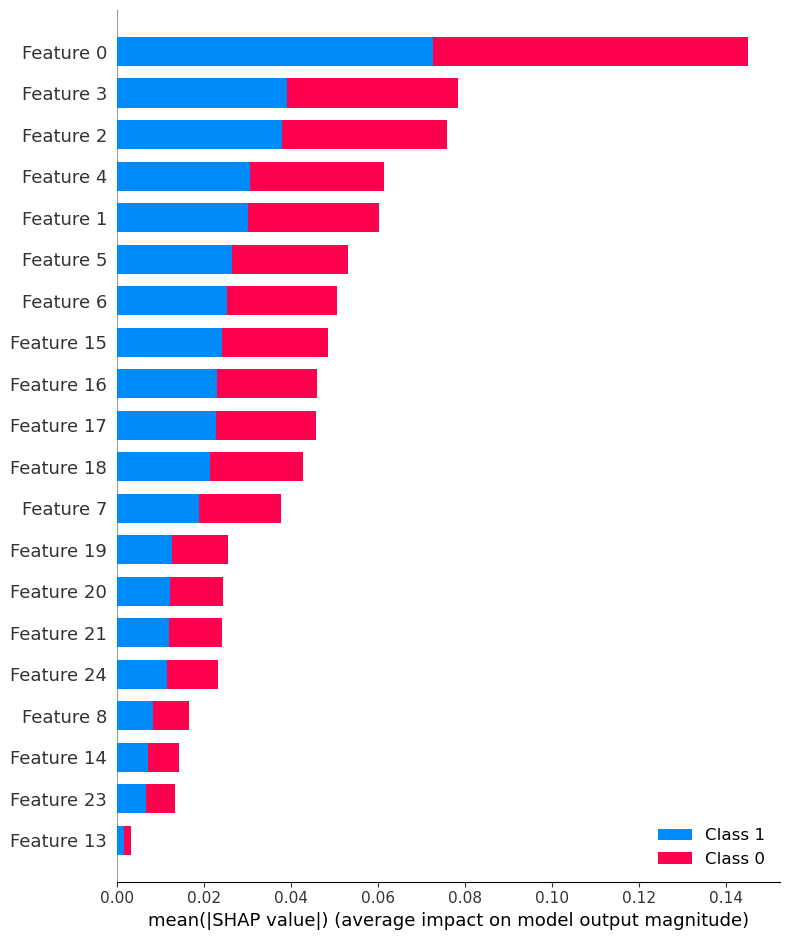

In [90]:
import shap

# Initialize JavaScript for SHAP visualizations in Jupyter Notebook
shap.initjs()

# Create a TreeExplainer for the Random Forest model
explainer = shap.TreeExplainer(random_forest_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")
